# Making a map and some plots with data from Wikipedia!

### Loading in some packages

In [0]:
import numpy as np # Math 
import pandas as pd # Data storage
import matplotlib.pyplot as plt # Plotting
import seaborn as sns # More plotting
import re # Data slice and dice


In [27]:
!pip install geopandas

In [0]:
import geopandas as gpd

# Geothermal Power Plant (from the US) Data from Wikipedia

This table is from Wikipedia, from [here](https://en.wikipedia.org/wiki/List_of_geothermal_power_stations_in_the_United_States). I used https://wikitable2csv.ggor.de/ to make a csv from the table! Pretty nifty. No guarnatees on accuracy, yadda yadda. 

In [29]:
cd /content/drive/My Drive/geothermal

/content/drive/My Drive/geothermal


Note! If using Colab or whatever, will have to navigate to where your folder is. 

In [30]:
ls

GeothermalPowerPlants_wikipedia.csv
states_21basic/
Wikipedia_Data_Exploration_Geothermal.ipynb


In [31]:
df = pd.read_csv('GeothermalPowerPlants_wikipedia.csv')
df.head(3)

,Name,State,Location,Capacity(MW),Annual Generation(GWh),Owner,Type,Year,Ref
0,Beowawe,Nevada,40°33′17″N 116°37′03″W﻿ / ﻿40.55472°N 116.61750°W,19.2,99 (2018),Terra-Gen Power,Flash steam (87%)Binary cycle (13%),1985,[4][5]
1,Blue Mountain,Nevada,40°59′42″N 118°08′35″W﻿ / ﻿40.99500°N 118.14306°W,50,229 (2018),Nevada Geothermal Power,Binary cycle,2009,[6][7][8]
2,Blundell,Utah,38°29′21″N 112°51′11″W﻿ / ﻿38.48917°N 112.85306°W,11,223 (2018),PacifiCorp,NaN,2007,[6][9]


Congrats! We just made a pandas data frame. For this size dataset, probably easier to plot in excel <gasp!/>. But! If this was 5x-100x larger which is possible, much easier to clean up using some python tools. Let's dig in.

Let's drop the Ref column, and change the names of two of the columns so they are easier to call. We will also remove the commas from the dataframe.

In [32]:
df = df.rename(columns={"Capacity(MW)": "Capacity_MW", "Annual Generation(GWh)": "AG_GWh"})
df = df.drop(columns=['Ref'])
df.replace(',','', regex=True, inplace=True)
df.head(2)

,Name,State,Location,Capacity_MW,AG_GWh,Owner,Type,Year
0,Beowawe,Nevada,40°33′17″N 116°37′03″W﻿ / ﻿40.55472°N 116.61750°W,19.2,99 (2018),Terra-Gen Power,Flash steam (87%)Binary cycle (13%),1985
1,Blue Mountain,Nevada,40°59′42″N 118°08′35″W﻿ / ﻿40.99500°N 118.14306°W,50,229 (2018),Nevada Geothermal Power,Binary cycle,2009


## Let's clean up this data frame

In [33]:
df.Capacity_MW.values

array(['19.2', '50', '11', '26', '272.3', '27', '92', '61', '39', '1590',
       '161.5', '432.3', '10', '4', '40', '138', '22', '64', '101.6',
       '70', '38', '11', '13.4', '11', '37', '73 [note 2]', '75', '13',
       '27', '18', '4 [note 3]'], dtype=object)

Two of these are problems, with [note 2,3] after the numbers, and we just want the numbers! A hint about this is dtype=object, and not int64

In [35]:
# Split on the space, taking the values before the space
df.Capacity_MW = df.Capacity_MW.str.split(r" *", expand=True)[0] 
df.Capacity_MW = pd.to_numeric(df.Capacity_MW) # Changing the type to numeric
df.Capacity_MW.values

AttributeError: ignored

In [36]:
df.AG_GWh.head(2) # the head(2) comment is just to show the first 2 

0     99 (2018)
1    229 (2018)
Name: AG_GWh, dtype: object

Same problem! Let's remove the years from this.

In [37]:
df.AG_GWh = df.AG_GWh.str.split(r" *", expand=True)[0]
df.AG_GWh = pd.to_numeric(df.AG_GWh)
df.AG_GWh.values

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1494: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)


array([  99,  229,  223,   77, 1176,  158,   91,  496,  327, 6516,  539,
       1741,   72,   13,  215,  771,  176,   56,  268,  138,  323,   83,
         98,   64,   61,  507,  159,   65,  213,  125,    9])

In [38]:
df.head(2)

,Name,State,Location,Capacity_MW,AG_GWh,Owner,Type,Year
0,Beowawe,Nevada,40°33′17″N 116°37′03″W﻿ / ﻿40.55472°N 116.61750°W,19.2,99,Terra-Gen Power,Flash steam (87%)Binary cycle (13%),1985
1,Blue Mountain,Nevada,40°59′42″N 118°08′35″W﻿ / ﻿40.99500°N 118.14306°W,50.0,229,Nevada Geothermal Power,Binary cycle,2009


Let's break up that location column. First step is to split it out, to only get the decimal degrees.

In [39]:
df.LocationDD = df.Location.str.split(r" / ", expand=True)[1]
df.LocationDD.head(2) # showing just the first two entries

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


0    ﻿40.55472°N 116.61750°W
1    ﻿40.99500°N 118.14306°W
Name: 1, dtype: object

Let's seperate decimal degrees into lat and long

In [40]:
df.latDD_N  = df.LocationDD.str.split(r" *", expand=True)[0]
df.longDD_W = df.LocationDD.str.split(r" *", expand=True)[1]

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1494: FutureWarning: split() requires a non-empty pattern match.
  f = lambda x: regex.split(x, maxsplit=n)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


And now lets drop the degrees symbol, and N and W. Also convert it to a number from an object. 

In [0]:
df.latDD_N.replace('°N','', regex=True, inplace=True)
df.longDD_W.replace('°W','', regex=True, inplace=True)

In [42]:
df.latDD_N.values


array(['\ufeff40.55472', '\ufeff40.99500', '\ufeff38.48917',
       '\ufeff39.79611', '\ufeff36.01667', '\ufeff38.56167',
       '\ufeff39.75389', '\ufeff39.96639', '\ufeff38.83611',
       '\ufeff38.79056', '\ufeff32.71444', '\ufeff33.16333',
       '\ufeff40.18111', '\ufeff32.14472', '\ufeff37.64556',
       '\ufeff39.58917', '\ufeff44.02306', '\ufeff33.01444',
       '\ufeff32.78306', '\ufeff39.58278', '\ufeff19.4785',
       '\ufeff42.09944', '\ufeff39.29444', '\ufeff40.38056',
       '\ufeff39.55611', '\ufeff39.39444', '\ufeff39.54583',
       '\ufeff38.16083', '\ufeff39.66778', '\ufeff41.46722',
       '\ufeff39.16333'], dtype=object)

Whoa! Got some unicode going on, lets drop that as well.

In [0]:
df.latDD_N.replace('\ufeff','', regex=True, inplace=True)
df.longDD_W.replace('\ufeff','', regex=True, inplace=True)

In [44]:
df.latDD_N.values

array(['40.55472', '40.99500', '38.48917', '39.79611', '36.01667',
       '38.56167', '39.75389', '39.96639', '38.83611', '38.79056',
       '32.71444', '33.16333', '40.18111', '32.14472', '37.64556',
       '39.58917', '44.02306', '33.01444', '32.78306', '39.58278',
       '19.4785', '42.09944', '39.29444', '40.38056', '39.55611',
       '39.39444', '39.54583', '38.16083', '39.66778', '41.46722',
       '39.16333'], dtype=object)

Converting it to a normal array from an object

In [0]:
df['latDD_N'] = pd.to_numeric(df.latDD_N)
df['longDD_W'] = pd.to_numeric(df.longDD_W)

df.latDD_N = pd.to_numeric(df.latDD_N)
df.longDD_W = pd.to_numeric(df.longDD_W)

# Because it is in the west, easier to put a negative
df.longDD_W = df.longDD_W*-1 

In [49]:
df.longDD_W.values

array([-116.6175 , -118.14306, -112.85306, -119.01   , -117.7975 ,
       -112.58   , -118.95361, -117.85583, -118.32417, -122.75583,
       -115.52694, -115.61667, -117.47583, -108.83861, -118.91167,
       -116.91167, -117.46778, -115.54083, -115.25417, -119.07472,
       -154.8888 , -113.3825 , -118.5725 , -119.39972, -118.84806,
       -119.7475 , -118.55611, -113.195  , -117.69306, -116.15056,
       -119.18056])

In [50]:
df.head(2)

,Name,State,Location,Capacity_MW,AG_GWh,Owner,Type,Year,latDD_N,longDD_W
0,Beowawe,Nevada,40°33′17″N 116°37′03″W﻿ / ﻿40.55472°N 116.61750°W,19.2,99,Terra-Gen Power,Flash steam (87%)Binary cycle (13%),1985,40.55472,116.61750
1,Blue Mountain,Nevada,40°59′42″N 118°08′35″W﻿ / ﻿40.99500°N 118.14306°W,50.0,229,Nevada Geothermal Power,Binary cycle,2009,40.99500,118.14306


## Plotting some of data up using Matplotlib, Seaborne and Geopandas 

Simple bar plot!

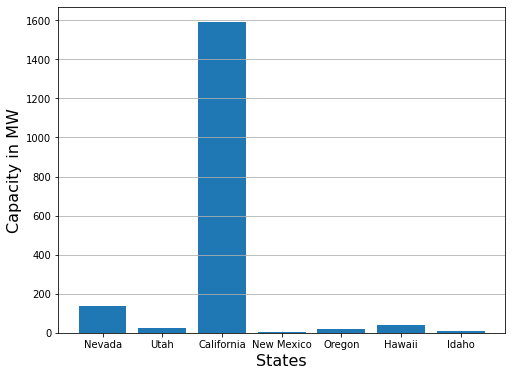

In [52]:
plt.figure(figsize=(8,6)) #calling the figure size
plt.bar(df.State, df.Capacity_MW) # State on the X axis, Capacity on the Y
plt.xlabel('States', size=16)
plt.ylabel('Capacity in MW', size = 16)
plt.grid(True, axis='y') 

Next up is a scatter plot

Text(0, 0.5, 'Capacity in MW')

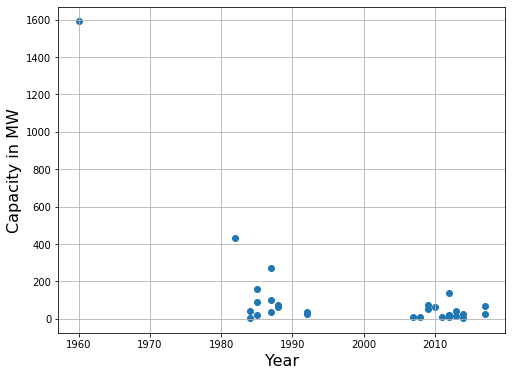

In [53]:
plt.figure(figsize=(8,6))
plt.scatter(df.Year.values, df.Capacity_MW.values)
plt.grid(True)

plt.xlabel('Year', size=16)
plt.ylabel('Capacity in MW', size = 16)

Adding some more information to this scatter plot, we are going to use Seaborn. 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


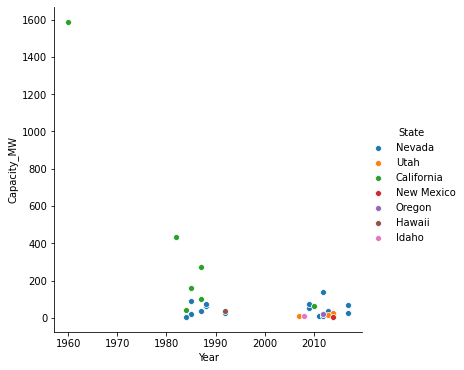

In [54]:
sns.pairplot(x_vars=["Year"], y_vars=["Capacity_MW"], data=df, hue="State", size=5)

Doing the same in matplotlib requires a loop, and is a bit messier. 

# Geopandas

In [0]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longDD_W, df.latDD_N)) # our data

usa = gpd.read_file("states_21basic/states.shp") # Basemap

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:504: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:504: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


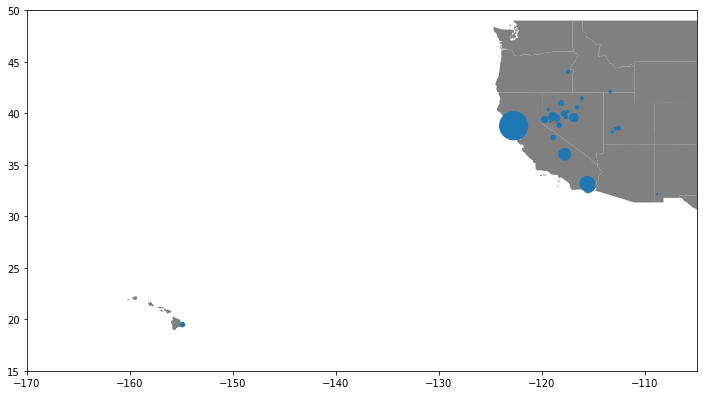

In [58]:
f, ax = plt.subplots(1, figsize=(12, 12))
usa.plot(axes=ax, facecolor='grey')
ax = gdf.plot(axes=ax, markersize=0.5*df['Capacity_MW'])

ax.set(xlim=(-170, -105), ylim=(15, 50))

plt.show()

Fitting in Hawaii is hard, let's just do the western US

/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:504: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,
/usr/local/lib/python3.6/dist-packages/geopandas/plotting.py:504: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


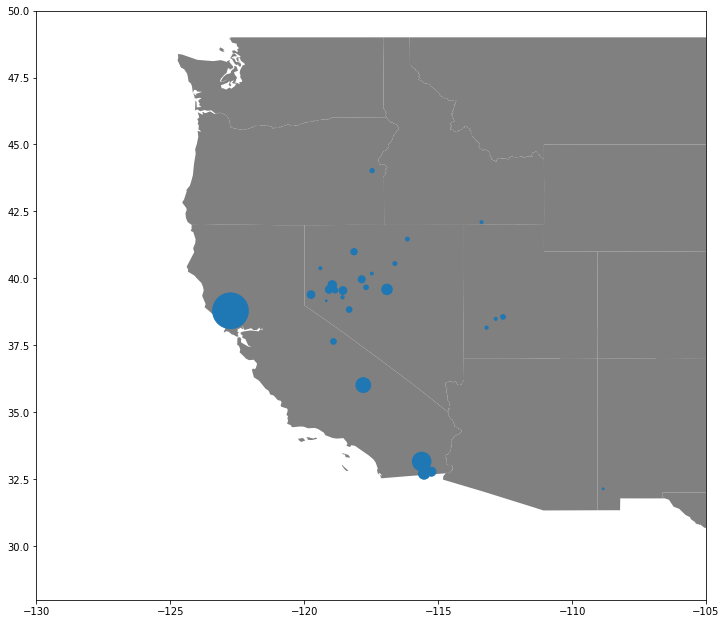

In [63]:
f, ax = plt.subplots(1, figsize=(12, 12))
usa.plot(axes=ax, facecolor='grey')
ax = gdf.plot(axes=ax, markersize=0.8*df['Capacity_MW'])

ax.set(xlim=(-130, -105), ylim=(28, 50))

plt.show()

Fin! This was not meant to be exhaustive, but merely show how a innocent looking dataset can take some work to get into shape.